# shAI Training 2021 | Level 1

Here we are working with diamonds dataset to try to predict the diamond pieces price using end to end ML project 



# 1.import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import plotly.express as px

# 2.Get the Data
 
 Reading diamonds.csv as a dataframe

In [14]:

diamonds=pd.read_csv('diamonds.csv')


# 3. Discover and visualize the data



# A- Data discovery


In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
diamonds = diamonds.drop(["Unnamed: 0"], axis=1)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


The summary of the numerical attributes


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# B- Data visualization


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcebbb69690>,
      dtype=object)

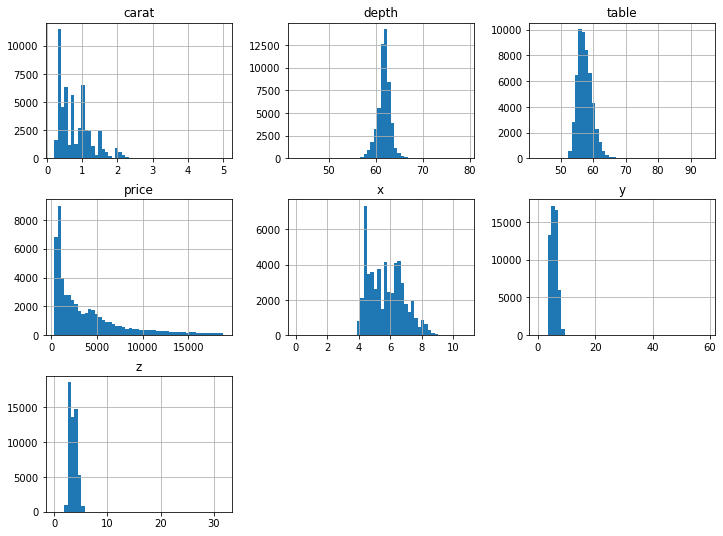

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
diamonds.hist(figsize=(12,9), bins=50)

In [6]:
fig = px.scatter(diamonds, x="carat", y="price",color = 'color')
fig.show()

In [ ]:
fig = px.scatter(diamonds, x="carat", y="price",color = 'cut')
fig.show()

In [ ]:
fig = px.scatter(diamonds, x="carat", y="price",color = 'clarity')
fig.show()

In [ ]:
#correlation between all continuous numeric variables
corr_matrix = diamonds.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

<AxesSubplot:>

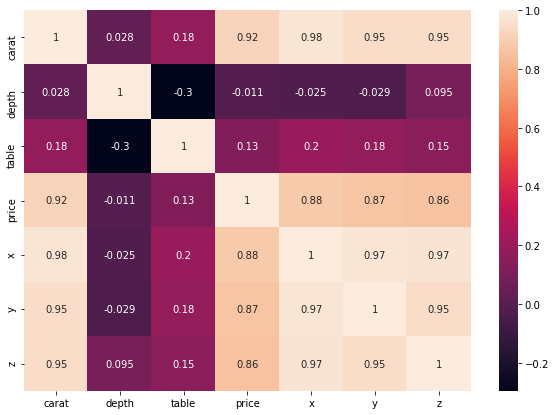

In [ ]:
##correlation between all continuous numerical variables
plt.figure(figsize=(10,7))
sns.heatmap(diamonds.corr(),annot=True)

"x", "y", "z" and "carat" show a high correlation to the price column.

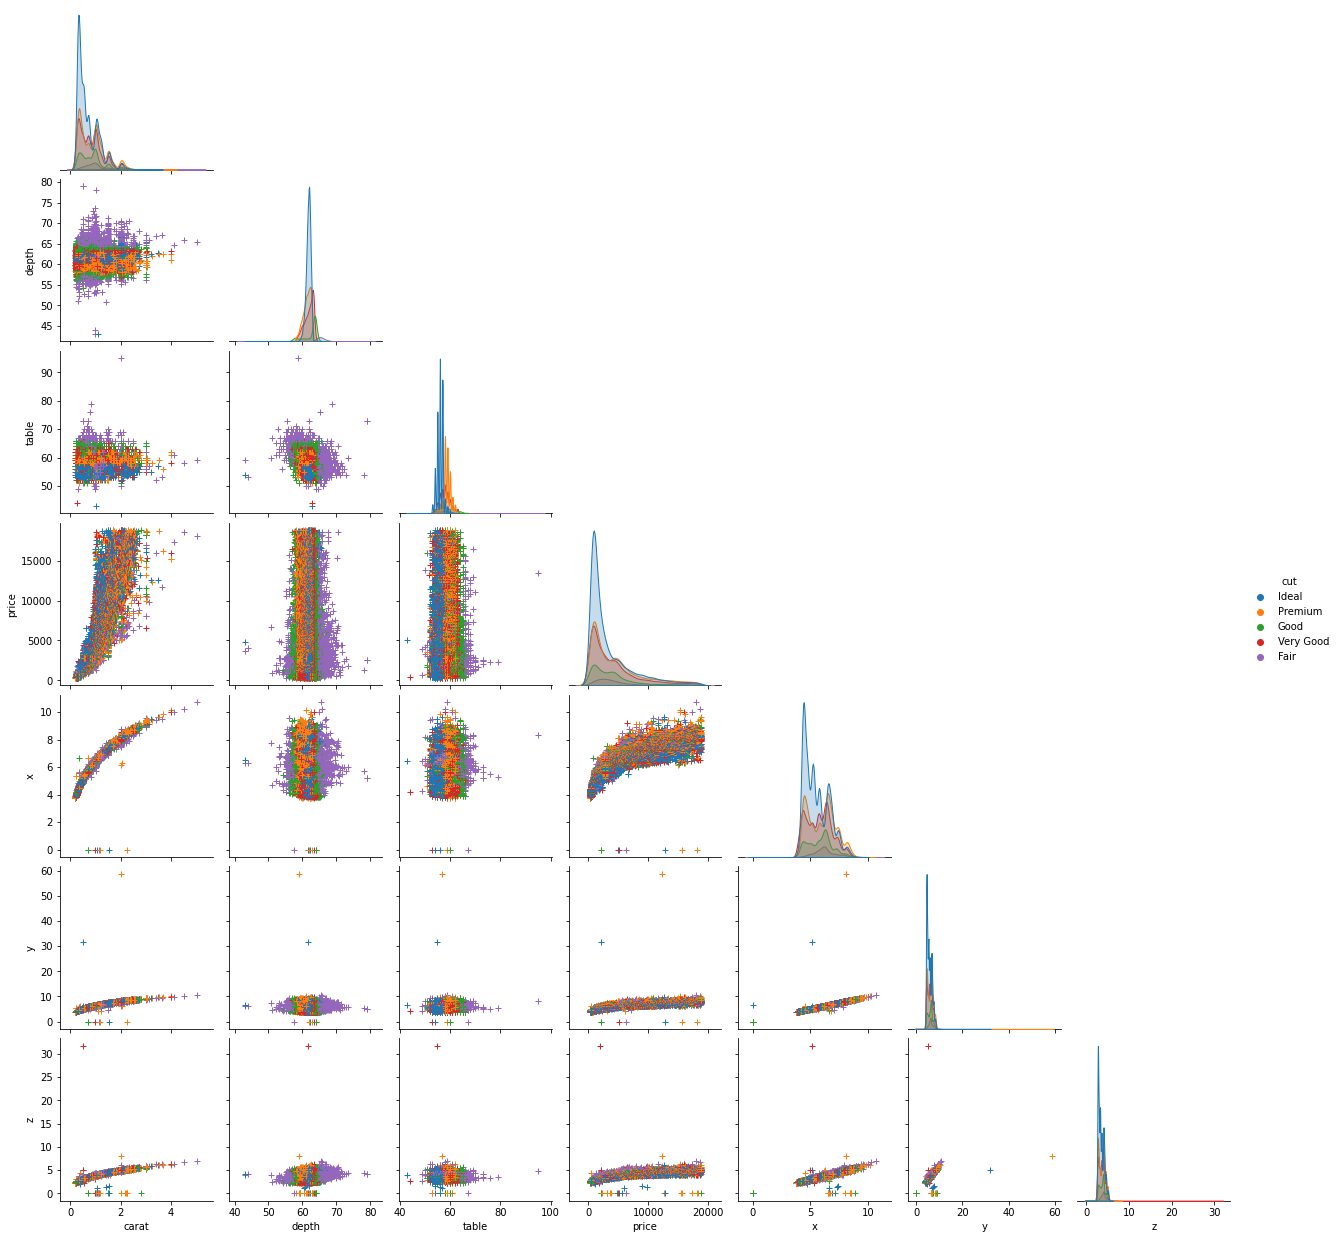

In [9]:
sns.pairplot(diamonds, hue = "cut", corner = True, plot_kws=dict(marker="+", linewidth=1));

array([[<AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='table', ylabel='carat'>,
        <AxesSubplot:xlabel='depth', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='table', ylabel='price'>,
        <AxesSubplot:xlabel='depth', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>,
        <AxesSubplot:xlabel='z', ylabel='price'>],
       [<AxesSubplot:xlabel='carat', ylabel='table'>,
        <AxesSubplot:xlabel='price', ylabel='table'>,
        <AxesSubplot:xlabel='table', ylabel='table'>,
        <AxesSubplot:xlabel='depth', ylabel='table'>,
        <AxesSubplot:xlabel='x', ylabel='table'>,


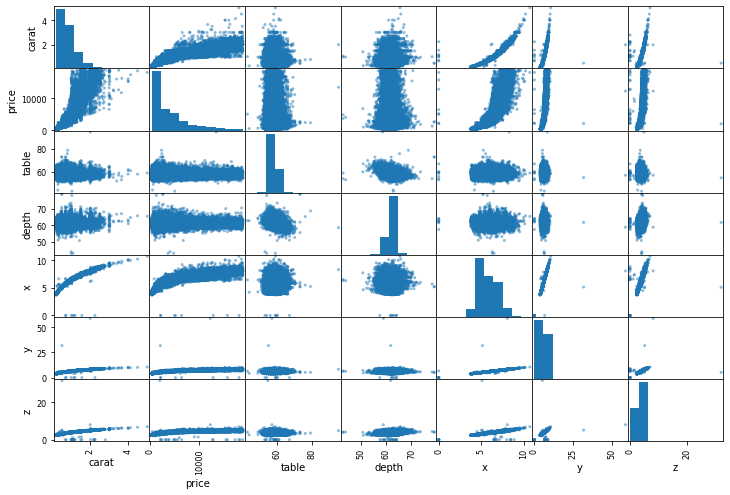

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "price", "table", "depth","x","y","z"]

scatter_matrix(diamonds[attributes], figsize=(12, 8))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


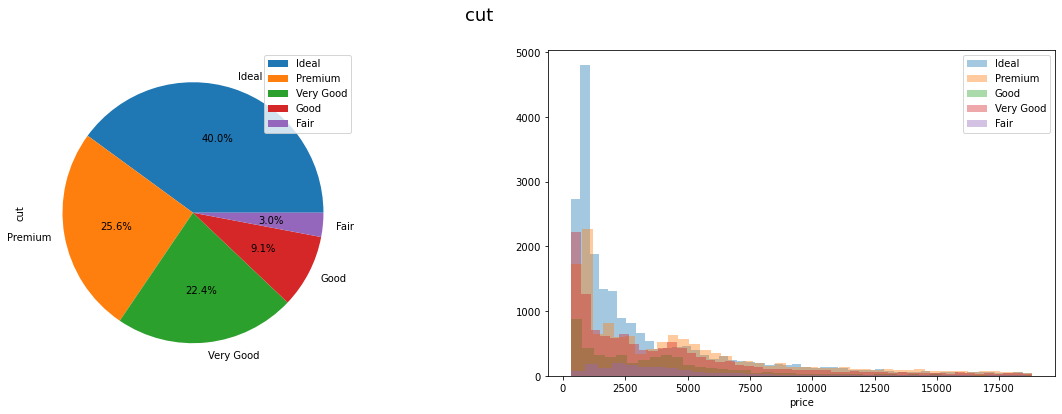

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


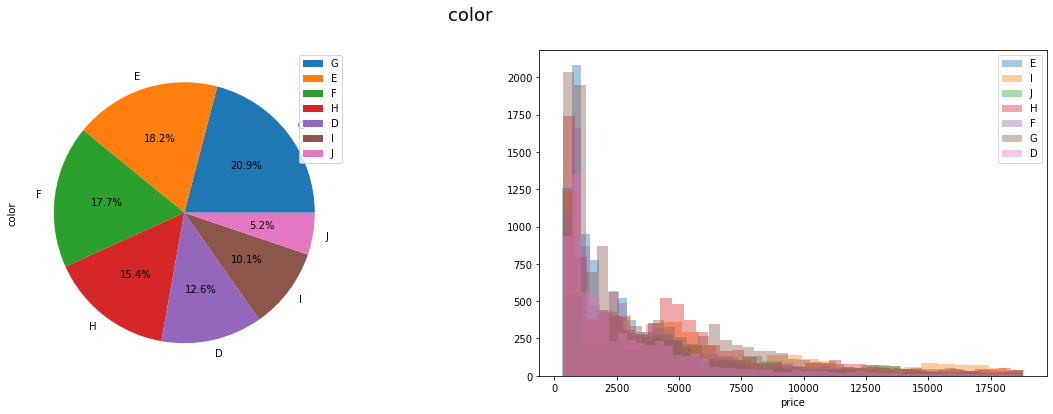

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


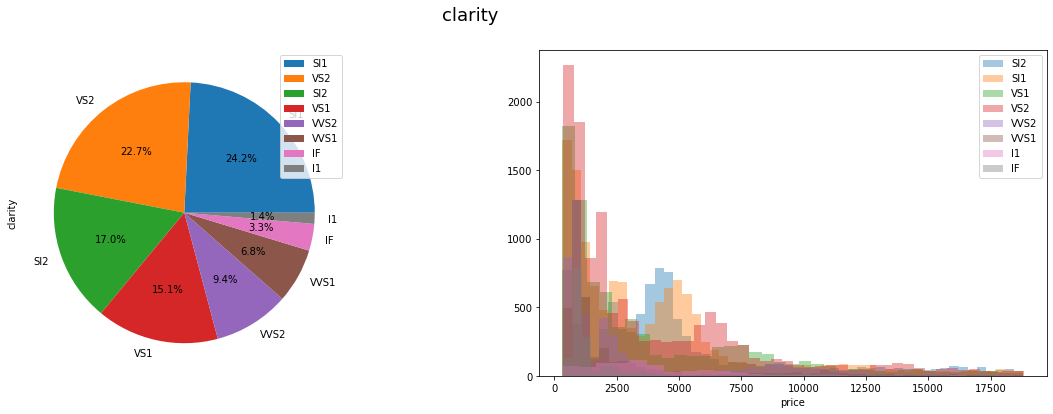

In [ ]:
for col in ['cut', 'color', 'clarity']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    diamonds[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
    ax[0].legend()
    for val in diamonds[col].unique():
        sns.distplot(diamonds[diamonds[col] == val]['price'], ax=ax[1], label=val, kde=False)
    ax[1].legend()
    plt.show()


# 4-Preparing the data





# A- Data Cleaning


checking if there are null-valuse in the dataFrame  

In [18]:
diamonds.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

checking if there are dulplicated rows in the dataFrame  


In [17]:
diamonds.duplicated().sum()


146

droping duplicated rows

In [ ]:
 
diamonds.drop_duplicates(inplace=True)

Checking if there are any zeros in dataframe


In [ ]:
(diamonds == 0).sum(axis=0)




carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           7
y           6
z          19
dtype: int64

droping rows with zero values 

In [ ]:

diamonds.drop(diamonds[(diamonds["x"] ==0) | (diamonds["y"] ==0) | (diamonds["z"] ==0)].index,inplace = True)
(diamonds == 0).sum(axis=0)


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# B- Handling Text and Categorical Attributes



identifying each non numerical attribute with his  categories

In [ ]:

print(diamonds["cut"].unique())
print(diamonds["color"].unique())
print(diamonds["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


transform each category to a column  

In [12]:

diamonds_cat_1 = diamonds[["cut"]]
diamonds_cat_2 = diamonds[["color"]]
diamonds_cat_3 = diamonds[["clarity"]]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
diamonds_cat_1hot = cat_encoder.fit_transform(diamonds_cat_1)
diamonds_cat_2hot = cat_encoder.fit_transform(diamonds_cat_2)
diamonds_cat_3hot = cat_encoder.fit_transform(diamonds_cat_3)
diamonds_cat_1hot.toarray()
diamonds_cat_2hot.toarray()
diamonds_cat_3hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# C- Feature Scaling

Transfering all the data to one scale using Standard Scaler


In [ ]:
from sklearn.preprocessing import StandardScaler

diamonds_num=diamonds.drop(["color",'cut','clarity'], axis = 1)
scaler = StandardScaler()
StandardScaler().fit_transform(diamonds_num)


array([[-1.19944812, -0.17363453, -1.10055766, ..., -1.59268605,
        -1.54015015, -1.58112245],
       [-1.24171672, -1.3627567 ,  1.58612585, ..., -1.64632452,
        -1.66301752, -1.75206016],
       [-1.19944812, -3.39125922,  3.37724818, ..., -1.5032886 ,
        -1.46116399, -1.75206016],
       ...,
       [-0.20613597,  0.73569418,  1.13834526, ..., -0.06398962,
        -0.04818927,  0.02854101],
       [ 0.13201284, -0.52337635,  0.24278409, ...,  0.37405789,
         0.33796531,  0.28494758],
       [-0.10046447,  0.316004  , -1.10055766, ...,  0.08798604,
         0.1185593 ,  0.14249948]])

# 5. Creating a Test Set and Train Set

In [ ]:
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)
diamonds = train_set.drop("price", axis=1)
diamonds_labels = train_set["price"].copy()

diamonds_num = diamonds.drop(["color",'cut','clarity'], axis=1)
num_attribs = list(diamonds_num)
cat_attribs = ["color",'cut','clarity']

num_pipeline = Pipeline([
 ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs)])

diamonds_prepared = full_pipeline.fit_transform(diamonds)


# 6.Selecting and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

In [ ]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 1170.80831104  5662.71615128 10427.4011452   4773.72362732
   782.83335738]
Labels: [1281, 4853, 11088, 4939, 911]


measureing this regression model’s RMSE on the whole training set

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1125.19704801194

Training a Decision Tree Regressor model



In [ ]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions = tree_reg.predict(diamonds_prepared)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.860928974808806

Evaluation Using Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

displaying the resultant scores and calculating its Mean and Standard deviation


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [727.00062381 743.54726628 760.68963617 773.8120351  753.96892065
 733.42858192 832.85120806 741.3475807  769.18763656 826.22343498]
Mean: 766.2056924230556
Standard deviation: 34.689154569743906


Displaying the resultant scores and calculating its Mean and Standard deviation for the Linear Regression model



In [ ]:
lin_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1136.61266463 1179.78592906 1083.0530026  1135.59347399 1137.84217117
 1106.18895631 1120.44834303 1402.9394234  1284.93135371 1158.8201851 ]
Mean: 1174.6215503007056
Standard deviation: 92.13946057312731


Training the Random Forest Regressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamonds_prepared, diamonds_labels)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)


forest_rmse

8.860928974808806

Displaying the resultant scores and calculating its Mean and Standard deviation for the Random Forest Regressor model



In [ ]:
forest_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,
scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [1136.61266463 1179.78592906 1083.0530026  1135.59347399 1137.84217117
 1106.18895631 1120.44834303 1402.9394234  1284.93135371 1158.8201851 ]
Mean: 1174.6215503007056
Standard deviation: 92.13946057312731


Saving every model 

In [ ]:
import joblib
joblib.dump(forest_reg, "my_model.pkl")
joblib.dump(tree_reg, "my_model.pkl")
joblib.dump(lin_reg, "my_model.pkl")


['my_model.pkl']

# 7.Fine-Tune the Model


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(diamonds_prepared, diamonds_labels)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

847.0431074518763 {'max_features': 2, 'n_estimators': 3}
698.3422189326503 {'max_features': 2, 'n_estimators': 10}
653.7397787945192 {'max_features': 2, 'n_estimators': 30}
773.2066402269785 {'max_features': 4, 'n_estimators': 3}
644.1877837236383 {'max_features': 4, 'n_estimators': 10}
604.9885367053538 {'max_features': 4, 'n_estimators': 30}
710.4424226443648 {'max_features': 6, 'n_estimators': 3}
611.0037196824255 {'max_features': 6, 'n_estimators': 10}
584.2046847059227 {'max_features': 6, 'n_estimators': 30}
672.6946476343561 {'max_features': 8, 'n_estimators': 3}
596.6901833932948 {'max_features': 8, 'n_estimators': 10}
570.1254854093481 {'max_features': 8, 'n_estimators': 30}
791.6282955136123 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
674.2428709939624 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
751.0487700363666 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
640.5891753422978 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

# 8.Analyzing the Best Models and Their Errors

In [ ]:


feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)



[(0.310510477238832, 'y'),
 (0.24821875743780142, 'x'),
 (0.22922423325126734, 'carat'),
 (0.10568209279357564, 'z'),
 (0.009940735131150244, 'J'),
 (0.006730660985731167, 'I'),
 (0.005814165020352378, 'table'),
 (0.004976350393784283, 'depth'),
 (0.004086726871502516, 'H'),
 (0.0034196149888477247, 'D'),
 (0.0027979563040958183, 'G'),
 (0.0024707728320652335, 'F'),
 (0.0022655728056293544, 'E')]

# 10.Evaluating The System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

549.3060742684535

# 11.Computing a 95% confidence interval for the generalization error

In [ ]:

from scipy import stats
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([526.93959713, 570.79680048])